In [1]:
import drawSvg as draw

In [2]:
import numpy as np
from numpy import pi

In [3]:
cm = 10 # some scaler to convert svg pixels to cm

In [4]:
n = 14 # number of sides in the Torus cross section
r = 90 # radius of the Torus cross section

In [5]:
N = 18 # number of sides of the Torus along the 'equator'
R = 300 # radius of the 'equator'

In [6]:
alpha = 2 * pi / n
alpha

0.4487989505128276

In [7]:
Alpha = 2 * pi / N
Alpha

0.3490658503988659

In [8]:
l = 2 * r * np.sin(alpha / 2)
l

40.05376811213659

In [9]:
hs = []
for i in range(n + 1):
    Ri = R - (r - r * np.cos(i * alpha))
    hi = 2 * Ri * np.sin(Alpha / 2)
    hs.append(hi)
    
# hs

In [10]:
import numpy as np

In [11]:
def Point(x, y):
    return np.array([x, y], dtype=float)

In [12]:
class Polyline:
    def __init__(self, points):
        assert len(points) > 0 and len(points) % 2 == 0
        self.points = points
    
    def to_path(self, **kwargs):
        path = draw.Path(**kwargs)
        
        for i, p in enumerate(self.points):
            if i == 0:
                path.M(*p)
            else:
                path.L(*p)
        
        return path

In [13]:
def rotate(xy, radians):
    x, y = xy
    xx = x * np.cos(radians) + y * np.sin(radians)
    yy = -x * np.sin(radians) + y * np.cos(radians)

    return Point(xx, yy)

def create_tab_old(line, offset):
    a, b = line.points
    
    u = (b - a) / np.linalg.norm(b - a) # unit vector a -> b
    n = u[[1,0]] # normal vector
    
    at = a - offset * n + offset * u
    bt = b - offset * n - offset * u

    return Polyline([a, at, bt, b])

def create_tab(line, offset):
    a, b = line.points
    
    u = (b - a) / np.linalg.norm(b - a) # unit vector a -> b
    
    a_step = offset * rotate(u, pi/4)
    b_step = offset * rotate(-u, 3*pi/4)

    at = a + a_step
    bt = b - b_step

    return Polyline([a, at, bt, b])

In [14]:
def create_copy(element, position):
    copy = draw.Group(transform=f'translate({position[0]}, {position[1]})')
    copy.append(element)
    return copy

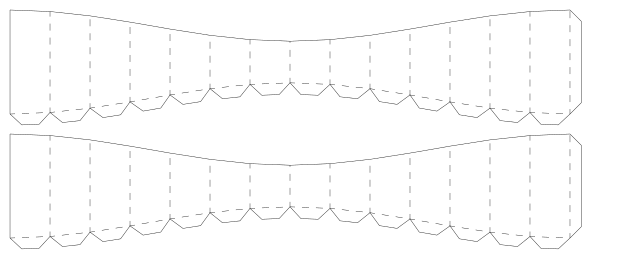

In [15]:
n_copies = 2
canvas_width = l * len(hs) + 20
canvas_height = n_copies * (np.max(hs) + 30)

origin = (-10, -(canvas_height - np.max(hs)/2) + 10)
d = draw.Drawing(canvas_width, canvas_height, origin=origin)

g = draw.Group(stroke='black', stroke_width='0.01cm')

a1 = b1 = None
a2 = b2 = None

dash_config = {
    'stroke_dasharray': '7',
    'stroke-dashoffset': '2'
}

tab_offset = l * 0.4

for i, h in enumerate(hs):
    
    a1, b1 = a2, b2
    
    a2 = Point(i * l, -h / 2)
    b2 = Point(i * l, h / 2)
    
    line = Polyline([a2, b2])
        
    if i == 0:
        g.append(line.to_path())
        continue
    g.append(line.to_path(**dash_config))
    
    line = Polyline([b1, b2])
    g.append(line.to_path())
    
    line = Polyline([a1, a2])
    g.append(line.to_path(**dash_config))
    
    tab = create_tab(line, tab_offset)
    g.append(tab.to_path(fill="none"))
    
    if i == len(hs) - 1:
        tab = create_tab(Polyline([a2, b2]), tab_offset)
        g.append(tab.to_path(fill="none"))


for i in range(n_copies):
    pos_y = i * (np.max(hs) + 20)
    copy = create_copy(g, [0, pos_y])
    d.append(copy)


# d.setPixelScale(1)  # Set number of pixels per geometry unit
# d.setRenderSize(800,800)  # Alternative to setPixelScale

d

In [ ]:
d.saveSvg('torus.svg')